In [38]:
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

In [39]:
!pwd

/Users/gcg/Desktop/DW_data/COP2018


In [40]:
df = pd.read_csv("data/Eurostat_nrg_100a_1_Data.csv")
df.head()

,TIME,GEO,UNIT,PRODUCT,INDIC_NRG,Value,Flag and Footnotes
0,2016,European Union (current composition),Thousand tonnes of oil equivalent (TOE),All products,Gross inland consumption,"1,640,614.5",NaN
1,2016,European Union (current composition),Thousand tonnes of oil equivalent (TOE),Solid fuels,Gross inland consumption,"240,724.0",NaN
2,2016,European Union (current composition),Thousand tonnes of oil equivalent (TOE),Total petroleum products,Gross inland consumption,"567,142.5",NaN
3,2016,European Union (current composition),Thousand tonnes of oil equivalent (TOE),Gas,Gross inland consumption,"382,969.5",NaN
4,2016,European Union (current composition),Thousand tonnes of oil equivalent (TOE),Nuclear heat,Gross inland consumption,"216,702.6",NaN


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 7 columns):
TIME                  246 non-null int64
GEO                   246 non-null object
UNIT                  246 non-null object
PRODUCT               246 non-null object
INDIC_NRG             246 non-null object
Value                 246 non-null object
Flag and Footnotes    0 non-null float64
dtypes: float64(1), int64(1), object(5)
memory usage: 13.5+ KB


In [42]:
def float_conversion(value_str):
    try:
        value=float(value_str.replace(",",""))
        return value
    except:
        pass

In [43]:
df['gross_inland_consumption_2016_TOE'] = df['Value'].apply(float_conversion)

In [44]:
df = df[['GEO', 'PRODUCT', 'gross_inland_consumption_2016_TOE']]
df.head(10)

,GEO,PRODUCT,gross_inland_consumption_2016_TOE
0,European Union (current composition),All products,1640614.5
1,European Union (current composition),Solid fuels,240724.0
2,European Union (current composition),Total petroleum products,567142.5
3,European Union (current composition),Gas,382969.5
4,European Union (current composition),Nuclear heat,216702.6
5,European Union (current composition),Renewable energies,216617.7
6,Belgium,All products,57451.1
7,Belgium,Solid fuels,2955.0
8,Belgium,Total petroleum products,23841.2
9,Belgium,Gas,14300.0


In [45]:
new_df = df[df['PRODUCT']=='All products']
new_df = new_df[["GEO", "gross_inland_consumption_2016_TOE"]]
new_df.columns = (['GEO', "Total_consumption_2016_TOE"])
new_df.head()

,GEO,Total_consumption_2016_TOE
0,European Union (current composition),1640614.5
6,Belgium,57451.1
12,Bulgaria,18128.0
18,Czechia,41807.2
24,Denmark,17421.6


In [46]:
product_list = []

for product in df['PRODUCT']:
    product_list.append(product)
    
products = set(product_list)

In [47]:
for product in products:
    temp = df[df['PRODUCT']== product]
    temp = temp[["GEO", "gross_inland_consumption_2016_TOE"]]
    variable_name = product + '_consumption_2016_TOE'
    temp.columns = (['GEO', variable_name])
    new_df = new_df.merge(temp, left_on = 'GEO', right_on = 'GEO')

In [48]:
new_df.columns

Index(['GEO', 'Total_consumption_2016_TOE', 'Solid fuels_consumption_2016_TOE',
       'All products_consumption_2016_TOE',
       'Renewable energies_consumption_2016_TOE',
       'Nuclear heat_consumption_2016_TOE',
       'Total petroleum products_consumption_2016_TOE',
       'Gas_consumption_2016_TOE'],
      dtype='object')

In [49]:
new_df = new_df[['GEO', 'Total_consumption_2016_TOE', 'Solid fuels_consumption_2016_TOE',
       'Renewable energies_consumption_2016_TOE',
       'Nuclear heat_consumption_2016_TOE',
       'Total petroleum products_consumption_2016_TOE',
       'Gas_consumption_2016_TOE']]

In [50]:
new_df.columns=(['GEO', 'Total_consumption_2016_TOE', 'Solid_fuels_consumption_2016_TOE',
       'Renewable_energies_consumption_2016_TOE',
       'Nuclear_heat_consumption_2016_TOE',
       'Petroleum_products_consumption_2016_TOE',
       'Gas_consumption_2016_TOE'])

In [51]:
new_df.head()

,GEO,Total_consumption_2016_TOE,Solid_fuels_consumption_2016_TOE,Renewable_energies_consumption_2016_TOE,Nuclear_heat_consumption_2016_TOE,Petroleum_products_consumption_2016_TOE,Gas_consumption_2016_TOE
0,European Union (current composition),1640614.5,240724.0,216617.7,216702.6,567142.5,382969.5
1,Belgium,57451.1,2955.0,3915.9,11226.9,23841.2,14300.0
2,Bulgaria,18128.0,5695.2,1947.3,4084.1,4231.2,2686.5
3,Czechia,41807.2,16617.1,4310.1,6238.8,8265.2,7016.3
4,Denmark,17421.6,1894.5,5007.9,0.0,6750.6,2895.6


In [52]:
new_df['Fossil_consumption_2016_TOE'] = new_df['Solid_fuels_consumption_2016_TOE'] + new_df['Petroleum_products_consumption_2016_TOE'] + new_df['Gas_consumption_2016_TOE']
new_df.head()

,GEO,Total_consumption_2016_TOE,Solid_fuels_consumption_2016_TOE,Renewable_energies_consumption_2016_TOE,Nuclear_heat_consumption_2016_TOE,Petroleum_products_consumption_2016_TOE,Gas_consumption_2016_TOE,Fossil_consumption_2016_TOE
0,European Union (current composition),1640614.5,240724.0,216617.7,216702.6,567142.5,382969.5,1190836.0
1,Belgium,57451.1,2955.0,3915.9,11226.9,23841.2,14300.0,41096.2
2,Bulgaria,18128.0,5695.2,1947.3,4084.1,4231.2,2686.5,12612.9
3,Czechia,41807.2,16617.1,4310.1,6238.8,8265.2,7016.3,31898.6
4,Denmark,17421.6,1894.5,5007.9,0.0,6750.6,2895.6,11540.7


In [54]:
selection = new_df[['GEO','Total_consumption_2016_TOE', 'Nuclear_heat_consumption_2016_TOE', 'Fossil_consumption_2016_TOE','Renewable_energies_consumption_2016_TOE']]
selection.head()

,GEO,Total_consumption_2016_TOE,Nuclear_heat_consumption_2016_TOE,Fossil_consumption_2016_TOE,Renewable_energies_consumption_2016_TOE
0,European Union (current composition),1640614.5,216702.6,1190836.0,216617.7
1,Belgium,57451.1,11226.9,41096.2,3915.9
2,Bulgaria,18128.0,4084.1,12612.9,1947.3
3,Czechia,41807.2,6238.8,31898.6,4310.1
4,Denmark,17421.6,0.0,11540.7,5007.9


In [55]:
selection['share_fossil'] = selection['Fossil_consumption_2016_TOE']/selection['Total_consumption_2016_TOE']*100
selection['share_nuclear'] = selection['Nuclear_heat_consumption_2016_TOE']/selection['Total_consumption_2016_TOE']*100
selection['share_renewables'] = selection['Renewable_energies_consumption_2016_TOE']/selection['Total_consumption_2016_TOE']*100

/Users/gcg/.virtualenvs/ddj/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/gcg/.virtualenvs/ddj/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [56]:
selection.head()

,GEO,Total_consumption_2016_TOE,Nuclear_heat_consumption_2016_TOE,Fossil_consumption_2016_TOE,Renewable_energies_consumption_2016_TOE,share_fossil,share_nuclear,share_renewables
0,European Union (current composition),1640614.5,216702.6,1190836.0,216617.7,72.584754,13.208624,13.203449
1,Belgium,57451.1,11226.9,41096.2,3915.9,71.532486,19.541662,6.816057
2,Bulgaria,18128.0,4084.1,12612.9,1947.3,69.576898,22.529237,10.741946
3,Czechia,41807.2,6238.8,31898.6,4310.1,76.299298,14.922788,10.309468
4,Denmark,17421.6,0.0,11540.7,5007.9,66.243629,0.000000,28.745351


In [69]:
shares = selection [['GEO', 'share_fossil', 'share_nuclear', 'share_renewables']]
shares

,GEO,share_fossil,share_nuclear,share_renewables
0,European Union (current composition),72.584754,13.208624,13.203449
1,Belgium,71.532486,19.541662,6.816057
2,Bulgaria,69.576898,22.529237,10.741946
3,Czechia,76.299298,14.922788,10.309468
4,Denmark,66.243629,0.000000,28.745351
5,Germany (until 1990 former territory of the FRG),80.800761,6.881116,12.265802
6,Estonia,86.154217,0.000000,15.529469
7,Ireland,92.504900,0.000000,7.460746
8,Greece,85.696120,0.000000,10.921864
9,Spain,72.620891,12.379354,14.267532


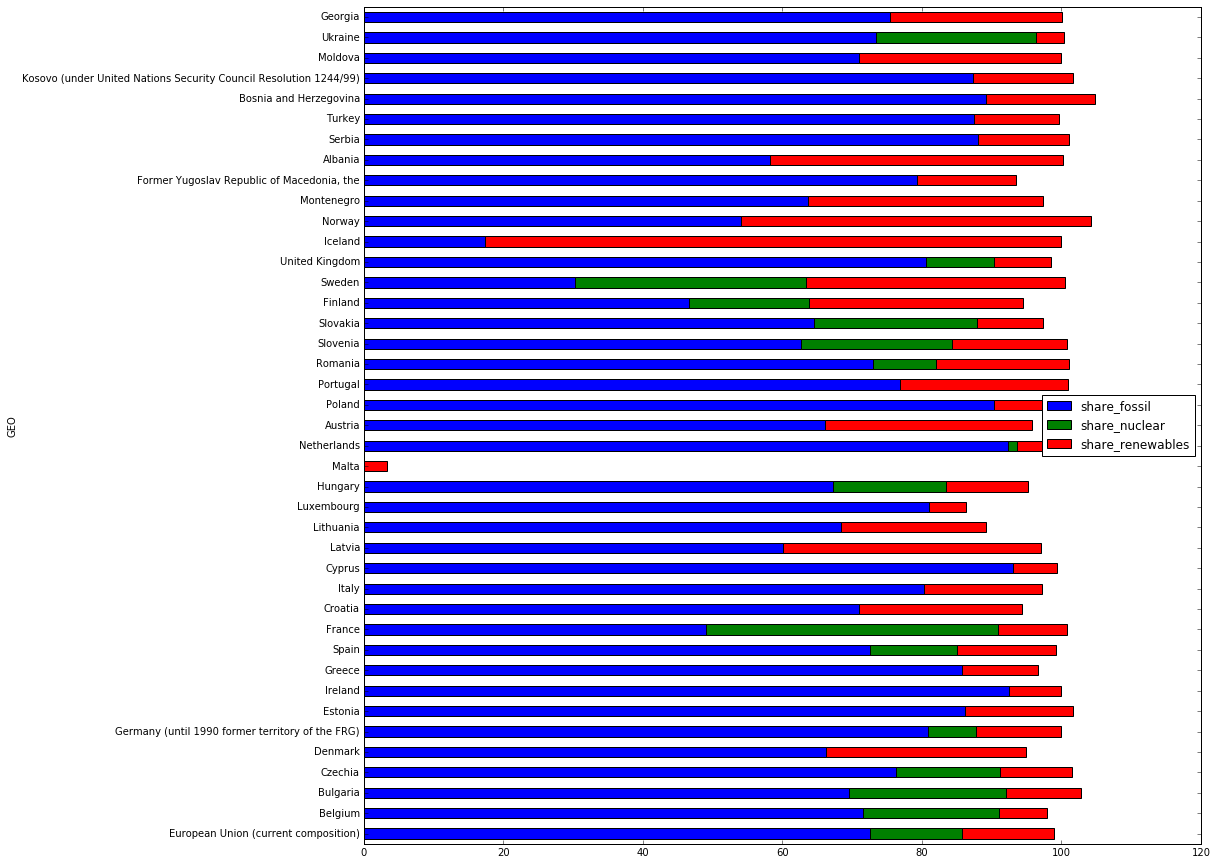

In [59]:
shares.plot.barh(stacked=True, figsize=(15,15), x='GEO')

In [61]:
selection[selection['GEO']=='Norway']

,GEO,Total_consumption_2016_TOE,Nuclear_heat_consumption_2016_TOE,Fossil_consumption_2016_TOE,Renewable_energies_consumption_2016_TOE,share_fossil,share_nuclear,share_renewables
30,Norway,27810.4,0.0,15030.8,13942.2,54.047407,0.0,50.133044


In [62]:
selection['calculated_total'] = selection['Nuclear_heat_consumption_2016_TOE']+selection['Fossil_consumption_2016_TOE']+selection['Renewable_energies_consumption_2016_TOE']

In [64]:
double_check = selection[['GEO','Total_consumption_2016_TOE', 'calculated_total']]
double_check['difference'] = double_check['Total_consumption_2016_TOE']-double_check['calculated_total']
double_check

/Users/gcg/.virtualenvs/ddj/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,GEO,Total_consumption_2016_TOE,calculated_total,difference
0,European Union (current composition),1640614.5,1624156.3,16458.2
1,Belgium,57451.1,56239.0,1212.1
2,Bulgaria,18128.0,18644.3,-516.3
3,Czechia,41807.2,42447.5,-640.3
4,Denmark,17421.6,16548.6,873.0
5,Germany (until 1990 former territory of the FRG),317268.3,317102.3,166.0
6,Estonia,6218.5,6323.2,-104.7
7,Ireland,14845.7,14840.6,5.1
8,Greece,24142.4,23325.9,816.5
9,Spain,122176.0,121281.4,894.6


In [65]:
shares_edit = shares.copy()
shares_edit['share_renewables_negative'] = [value *-1 for value in shares_edit['share_renewables']]
shares_edit = shares_edit[['GEO', 'share_fossil', 'share_nuclear', 'share_renewables_negative']]
shares_edit.head()

,GEO,share_fossil,share_nuclear,share_renewables_negative
0,European Union (current composition),72.584754,13.208624,-13.203449
1,Belgium,71.532486,19.541662,-6.816057
2,Bulgaria,69.576898,22.529237,-10.741946
3,Czechia,76.299298,14.922788,-10.309468
4,Denmark,66.243629,0.000000,-28.745351


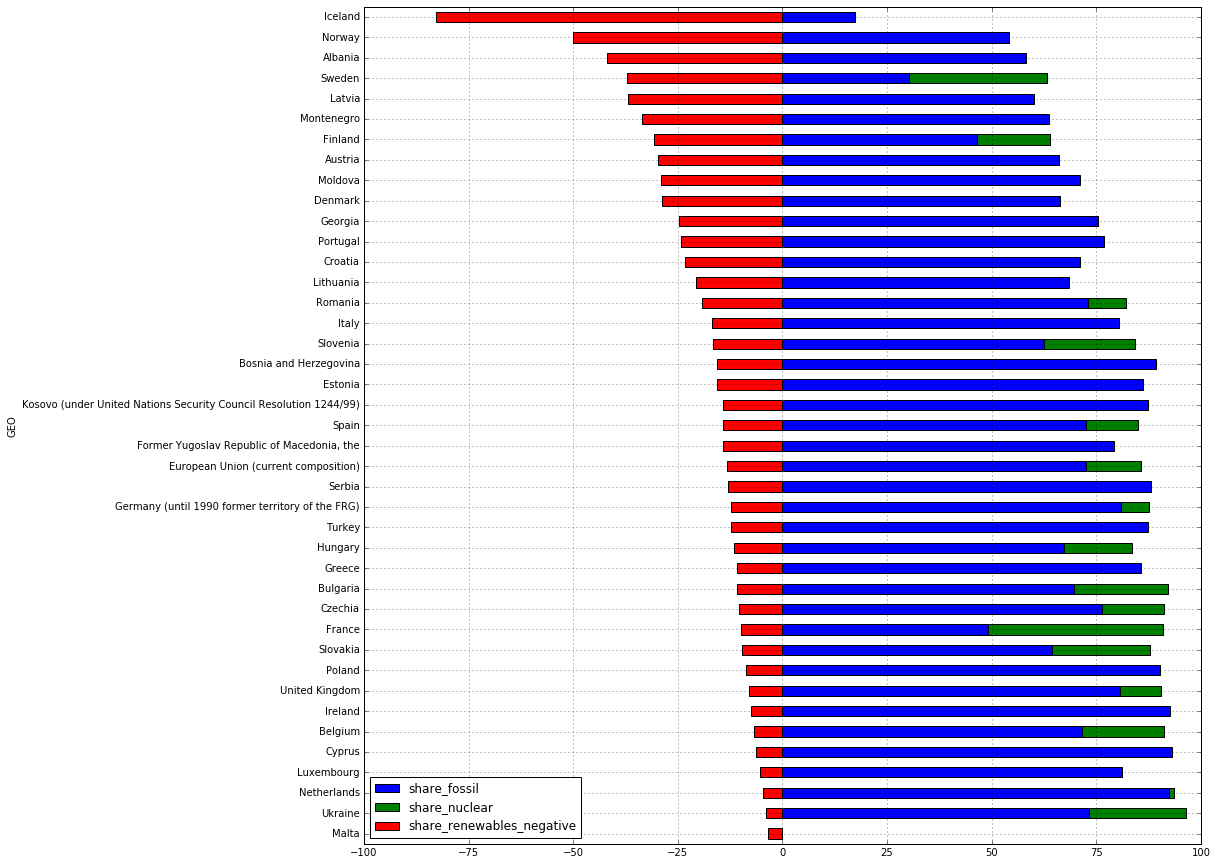

In [68]:
fig, ax = plt.subplots(figsize=(15,15))
ax = shares_edit.sort_values(by="share_renewables_negative", ascending=False).plot.barh(ax = ax, stacked=True, x='GEO')
ax.grid()
ax.set_xticks([-100,-75,-50,-25,0,25,50,75,100])
# plt.savefig('draft-energymix-gross-inland.pdf', transparent = True)